In [1]:
!pip install peft -q
!pip install diffusers -q
!pip install diffusers transformers accelerate --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.30.1
    Uninstalling accelerate-0.30.1:
      Successfully uninstalled accelerate-0.30.1


In [2]:
import peft
import transformers
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

2024-06-15 21:52:19.640472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 21:52:19.640588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 21:52:19.903717: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_

In [6]:
def plot_images(pipe, prompt, n):
    images = []
    for _ in range(n):
        image = pipe(prompt).images[0]
        images.append(image)

    fig, axes = plt.subplots(1, n, figsize=(4*n, 6))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

1)	Карты Газпромбанка

In [23]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:0')
pipe.load_lora_weights("/kaggle/input/lct-dataset/0v/gazprocard_lora.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

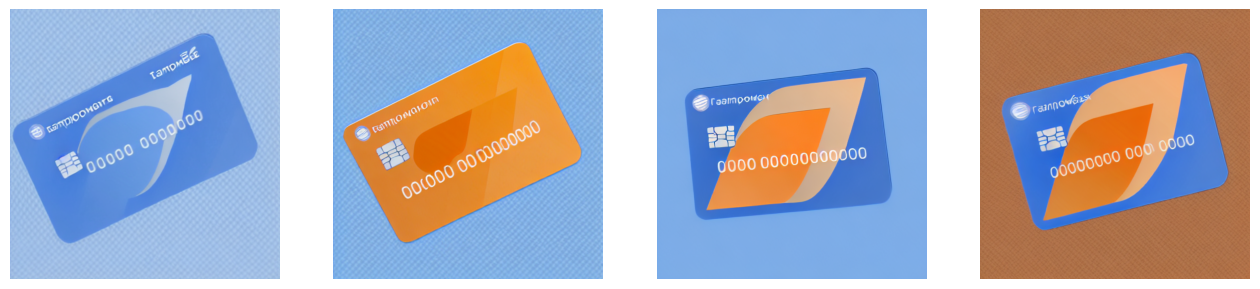

In [24]:
prompt = "gazpromcard isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe, prompt, 4)

2)	Фотографии из предоставленного датасета, большое количество карт газпромбанка

In [25]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe0 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:1')
pipe0.load_lora_weights("/kaggle/input/lct-dataset/8v M/GAZPROM_lora_Masha.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

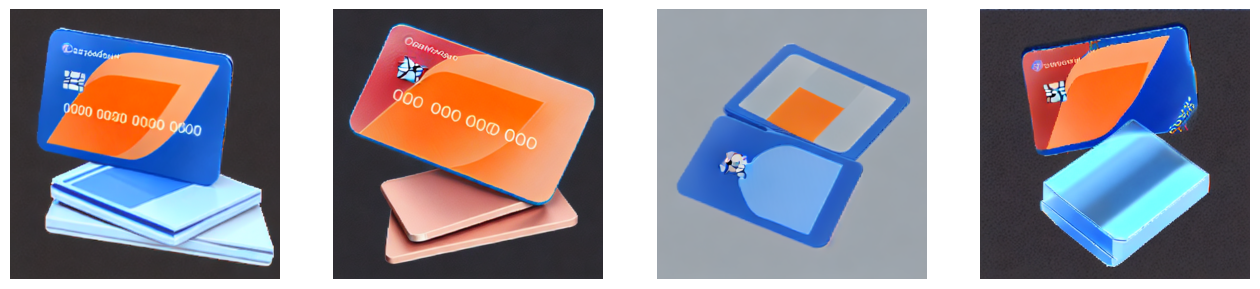

In [26]:
prompt = "gazpromcard isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe0, prompt, 4)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

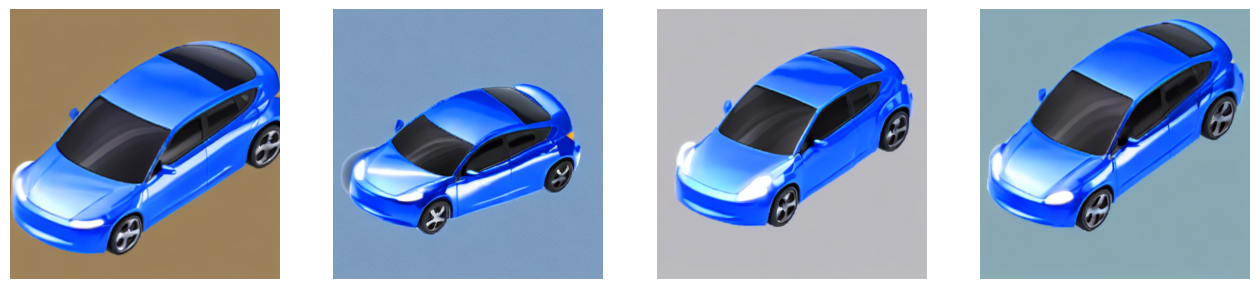

In [27]:
prompt = "blue car isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe0, prompt, 4)

3)	Фотографии из предоставленного датасета, фото из интернета схожей стилистики (318 фото), промпты написаны вручную
Плюсы: получена нужная стилистика для генерации разных картинок
Минусы: низкое качество картинок, не может генерировать комплексные картинки


In [4]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe1 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:0')
pipe1.load_lora_weights("/kaggle/input/lct-dataset/1v/GAZPROM_lora.safetensors")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

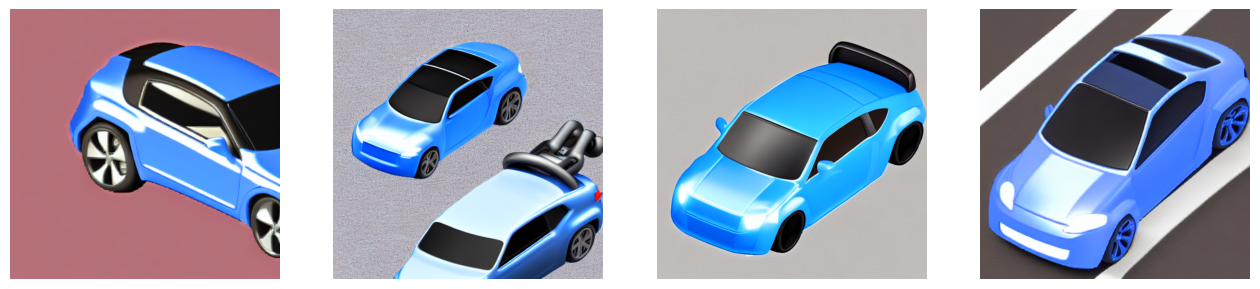

In [8]:
prompt = "blue car isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe1, prompt, 4)

4)	Фотографии высокого качества из предоставленного датасета, фото из интернета схожей стилистики (168 фото)
Минусы: все равно невысокое качество картинок, не может генерировать комплексные картинки


In [9]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe2 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:0')
pipe2.load_lora_weights("/kaggle/input/lct-dataset/3v/GAZPROM_lora_hight_quality_new_promt.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

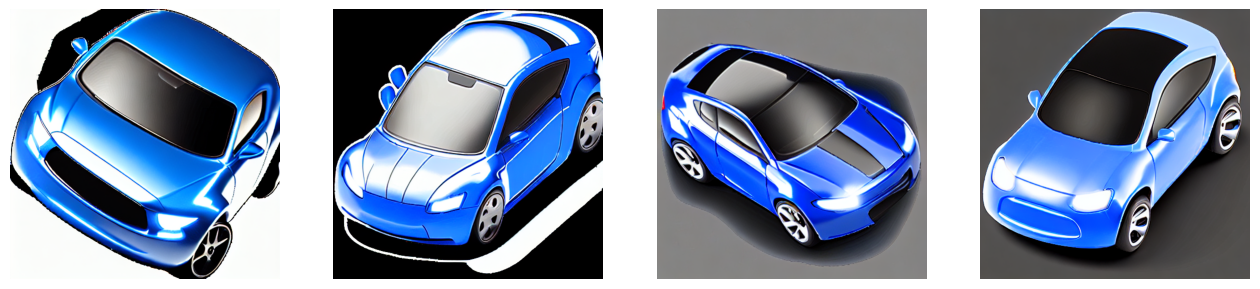

In [10]:
prompt = "blue car isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe2, prompt, 4)

5)	Фотографии из предоставленного датасета высокого качества перекрашенные в фирменные цвета Газпромбанка – оранжевый и синий.
Плюсы: генерирует картинки нужных цветов
Минусы: низкое качество картинок, не может генерировать комплексные картинки


In [12]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe3 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:0')
pipe3.load_lora_weights("/kaggle/input/lct-dataset/4v/GAZPROM_lora_blue_orange.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

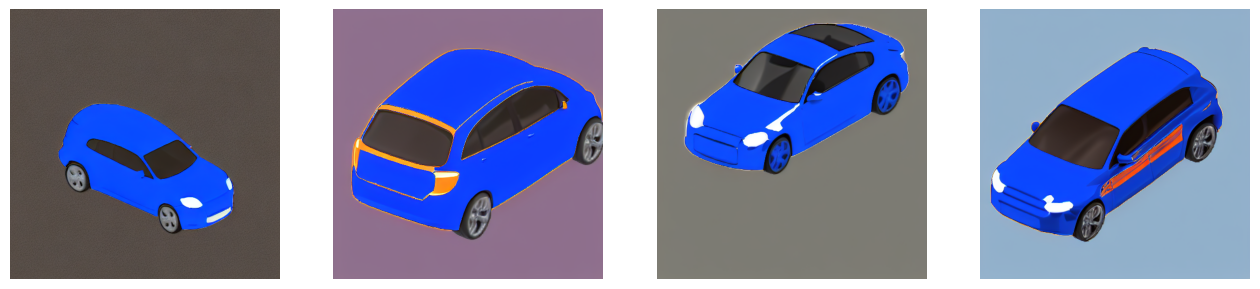

In [13]:
prompt = "blue car isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe3, prompt, 4)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

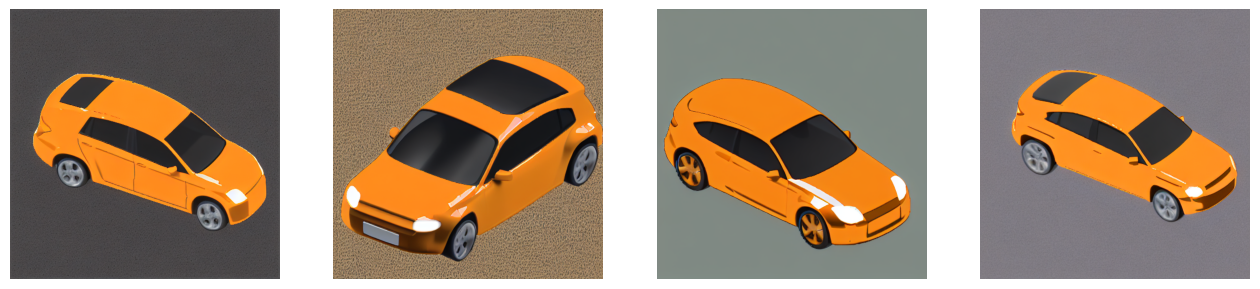

In [14]:
prompt = "orange car isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe3, prompt, 4)

6)	Фотографии и промпты полученные в результате автогенерации датасета (1000 фото)
Плюсы: высокое качество картинок, большое разнообразие 
Минусы: частая генерация множества одних и тех же объектов вместо одного


In [15]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe4 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:0')
pipe4.load_lora_weights("/kaggle/input/lct-dataset/6v/GAZPROM_lora_auto_dataset.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

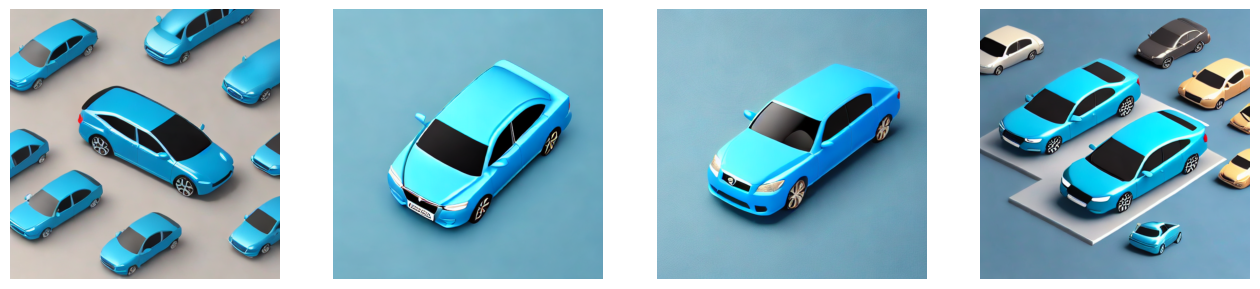

In [18]:
prompt = "blue car isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe4, prompt, 4)

7)	Фотографии и промпты полученные в результате автогенерации датасета (900 фото) после чистки фотографий, на которых множество одних и тех же объектов
Плюсы: генерируется одна сцена в середине фотографии


In [19]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe5 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:1')
pipe5.load_lora_weights("/kaggle/input/lct-dataset/7v/filtered_dataset.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

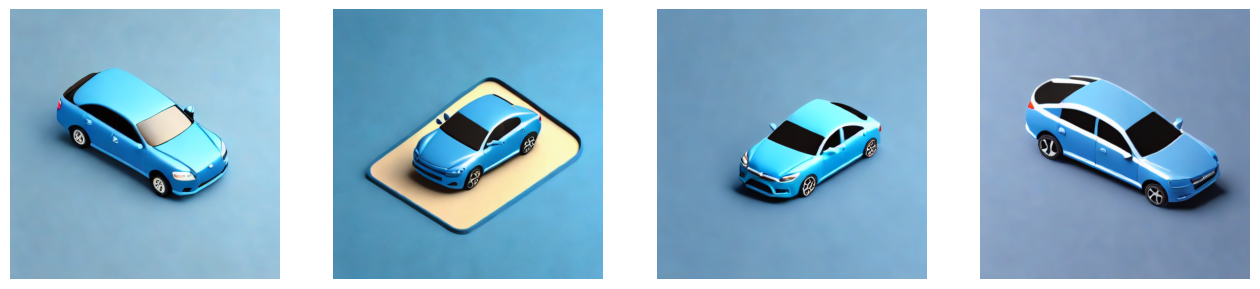

In [20]:
prompt = "blue car isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe5, prompt, 4)

8)	Фотографии полученные в результате автогенерации датасета, фотографии из исходного датасета, фотографии из интернета. Все фотографии не имеют никаких дефектов. Промпты составлены по картинкам с помощью модели Bootstrapping Language-Image Pre-training.

In [21]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe6 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:1')
pipe6.load_lora_weights("/kaggle/input/lct-dataset/GAZPROM_850_photo-000014.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

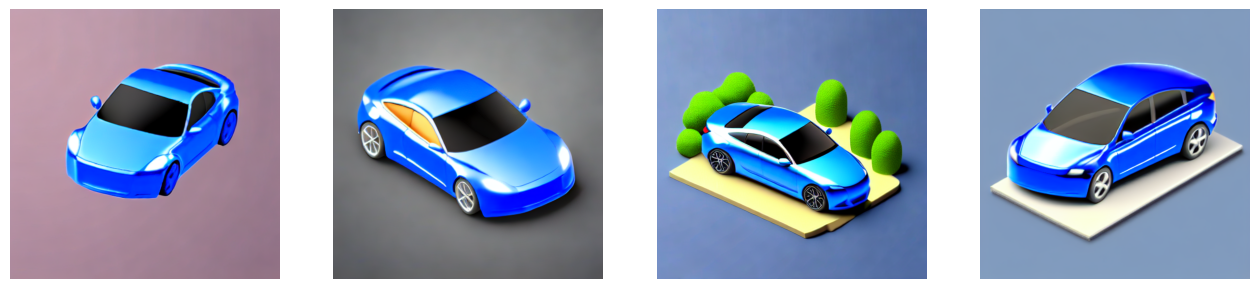

In [22]:
prompt = "blue car isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe6, prompt, 4)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

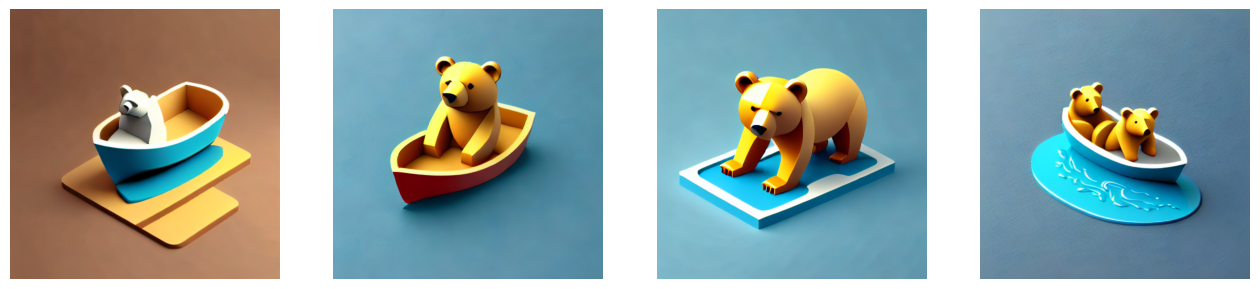

In [29]:
prompt = "A bear in a boat isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe6, prompt, 4)